<a href="https://colab.research.google.com/github/moammann/Kerv/blob/master/Kervolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

## From Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Kervolution


## Import needed packages

In [0]:
!python '/content/drive/My Drive/Kerv/setup.py' install
!pip install gast==0.2.2

Restart Runtime and load Packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [0]:
sys.path.insert(1, "/content/drive/My Drive/Kerv")
from tf_keras_kervolution_2d import KernelConv1D, KernelConv2D, PolynomialKernel

## Tensorboard

In [5]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://873e73ec.ngrok.io


In [0]:
tensboar = TensorBoardColabCallback(tbc,write_graph=True,write_images=True)

## Load Data

In [25]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, AveragePooling2D
from keras import backend as K
from keras.optimizers import SGD

batch_size = 50
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Mnist, CNN, LeNet 5

In [9]:
model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1),name='Conv1'))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu',name='Conv2'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.003, momentum=0.9, nesterov=False),
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_5 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_6 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

In [0]:
for layer in model.layers:
  if 'Conv1' in layer.name:
    filters1, biases1 = layer.get_weights()
  if 'Conv2' in layer.name:
    filters2, biases2 = layer.get_weights()
filters1 = np.squeeze(filters1)
filters2 = np.squeeze(filters2)

/usr/local/lib/python3.6/dist-packages/matplotlib/colorbar.py:214: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


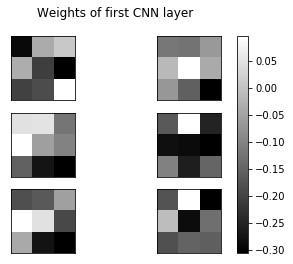

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2)
plt.xticks([])
plt.yticks([])
i=0

for ax in axes.flat:
    im = ax.imshow(filters1[:,:,i], cmap='gray')
    i+=1

fig.colorbar(im, ax=axes.ravel().tolist())
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

fig.suptitle('Weights of first CNN layer')
plt.savefig('mnist_comp_CNN_standard.pdf')

plt.show()

## Mnist, CNN, LeNet 5, w/o Pooling, stride 2

In [28]:
model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), strides = 2, activation='relu', input_shape=(28,28,1),name='Conv1'))
# model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), strides = 2, activation='relu',name='Conv2'))
# model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.003, momentum=0.9, nesterov=False),
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensboar])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 13, 13, 6)         60        
_________________________________________________________________
Conv2 (Conv2D)               (None, 6, 6, 16)          880       
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_14 (Dense)             (None, 84)                10164     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                850       
Total params: 81,194
Trainable params: 81,194
Non-trainable params: 0
__________________________________________________

In [0]:
for layer in model.layers:
  if 'Conv1' in layer.name:
    filters1, biases1 = layer.get_weights()
  if 'Conv2' in layer.name:
    filters2, biases2 = layer.get_weights()
filters1 = np.squeeze(filters1)
filters2 = np.squeeze(filters2)

/usr/local/lib/python3.6/dist-packages/matplotlib/colorbar.py:214: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


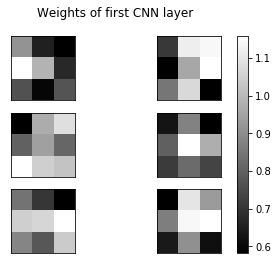

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=2)
plt.xticks([])
plt.yticks([])
i=0

for ax in axes.flat:
    im = ax.imshow(filters1[:,:,i], cmap='gray')
    i+=1

fig.colorbar(im, ax=axes.ravel().tolist())
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

fig.suptitle('Weights of first CNN layer')
plt.savefig('mnist_comp_CNN_no_pool.pdf')

plt.show()

## Mnist KCNN, LeNet 5

In [16]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, AveragePooling2D
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.optimizers import SGD
import keras
import tensorflow
from tf_keras_kervolution_2d import KernelConv1D, KernelConv2D, PolynomialKernel, LinearKernel, L1Kernel, L2Kernel, GaussianKernel


model = Sequential()

model.add(KernelConv2D(input_shape=input_shape, filters=6, kernel_size=3,kernel_function=PolynomialKernel(p=3, c=1), name='KConv1'))
# model.add(KernelConv2D(input_shape=input_shape, filters=6, kernel_size=3,kernel_function=GaussianKernel(gamma=0.5), name='KConv1'))
model.add(AveragePooling2D())

model.add(KernelConv2D(filters=16, kernel_size=3,kernel_function=PolynomialKernel(p=3, c=1), name='KConv2'))
# model.add(KernelConv2D(filters=16, kernel_size=3,kernel_function=GaussianKernel(gamma=0.5), name='KConv2'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.003, momentum=0.9, nesterov=False),
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
ksizes is deprecated, use sizes instead
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
KConv1 (KernelConv2D)        (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
KConv2 (KernelConv2D)        (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
den

In [0]:
for layer in model.layers:
  if 'KConv1' in layer.name:
    filters1, biases1 = layer.get_weights()
  if 'KConv2' in layer.name:
    filters2, biases2 = layer.get_weights()
filters1 = np.squeeze(filters1)
filters2 = np.squeeze(filters2)

/usr/local/lib/python3.6/dist-packages/matplotlib/colorbar.py:214: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


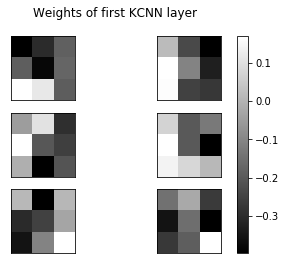

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2)
plt.xticks([])
plt.yticks([])
i=0

for ax in axes.flat:
    im = ax.imshow(filters1[:,:,i], cmap='gray')
    i+=1

fig.colorbar(im, ax=axes.ravel().tolist())
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
fig.suptitle('Weights of first KCNN layer')
plt.savefig('mnist_comp_KCNN_standard.pdf')
plt.show()

## Mnist, KCNN, LeNet 5, w/o Pooling, stride 2

In [22]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, AveragePooling2D
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.optimizers import SGD
import keras
import tensorflow
from tf_keras_kervolution_2d import KernelConv1D, KernelConv2D, PolynomialKernel, LinearKernel, L1Kernel, L2Kernel, GaussianKernel


model = Sequential()

model.add(KernelConv2D(input_shape=input_shape, filters=6,strides=2, kernel_size=3,kernel_function=PolynomialKernel(p=3, c=1), name='KConv1'))
# model.add(KernelConv2D(input_shape=input_shape, filters=6, kernel_size=3,kernel_function=GaussianKernel(gamma=0.5), name='KConv1'))
# model.add(AveragePooling2D())

model.add(KernelConv2D(filters=16, strides=2, kernel_size=3,kernel_function=PolynomialKernel(p=3, c=1), name='KConv2'))
# model.add(KernelConv2D(filters=16, kernel_size=3,kernel_function=GaussianKernel(gamma=0.5), name='KConv2'))
# model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.003, momentum=0.9, nesterov=False),
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
KConv1 (KernelConv2D)        (None, 13, 13, 6)         60        
_________________________________________________________________
KConv2 (KernelConv2D)        (None, 6, 6, 16)          880       
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_7 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                850       
Total params: 81,194
Trainable params: 81,194
Non-trainable params: 0
__________________________________________________

In [0]:
for layer in model.layers:
  if 'KConv1' in layer.name:
    filters1, biases1 = layer.get_weights()
  if 'KConv2' in layer.name:
    filters2, biases2 = layer.get_weights()
filters1 = np.squeeze(filters1)
filters2 = np.squeeze(filters2)

/usr/local/lib/python3.6/dist-packages/matplotlib/colorbar.py:214: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


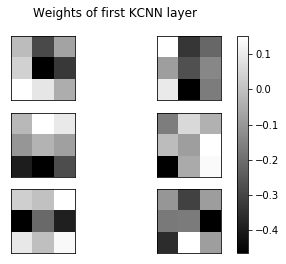

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2)
plt.xticks([])
plt.yticks([])
i=0

for ax in axes.flat:
    im = ax.imshow(filters1[:,:,i], cmap='gray')
    i+=1

fig.colorbar(im, ax=axes.ravel().tolist())
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
fig.suptitle('Weights of first KCNN layer')
plt.savefig('mnist_comp_KCNN_no_pool.pdf')
plt.show()